---
format:
    html:
        toc: true

---

# Homework 4: SQL Miniproject
# Lizzie Healy

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp

## Problem 1

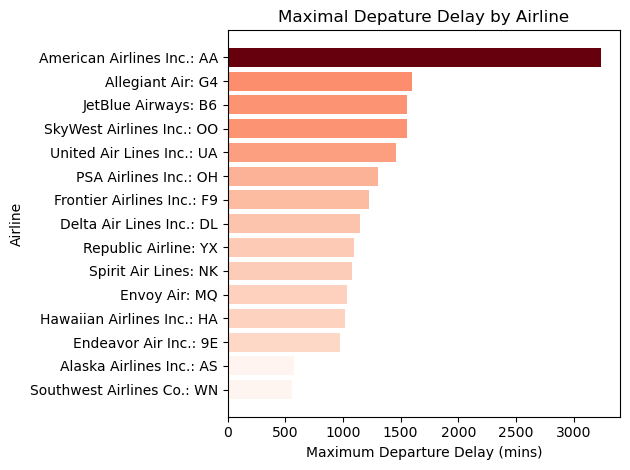

In [222]:
# Read in the Problem 1 Results
prob1 = pd.read_csv('./data/problem1_results.csv')
# print(prob1)
# taking the x and y values
x = prob1['Name']
y = prob1['max_departure_delay']

# normalizing to get color gradient
norm = plt.Normalize(y.min(), y.max())
colors = plt.cm.Reds(norm(y))

# plotting horizontal bars
fig, ax = plt.subplots()
ax.barh(x, y, align='center', color=colors)
ax.set_xlabel('Maximum Departure Delay (mins)') # axis titles
ax.set_ylabel('Airline')
ax.set_title('Maximal Depature Delay by Airline')
plt.tight_layout() # layout so words are cut
# saving the plot
plt.savefig('./output/prob1_fig')

# displaying the plot
plt.show()

# https://matplotlib.org/stable/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py

## Problem 2

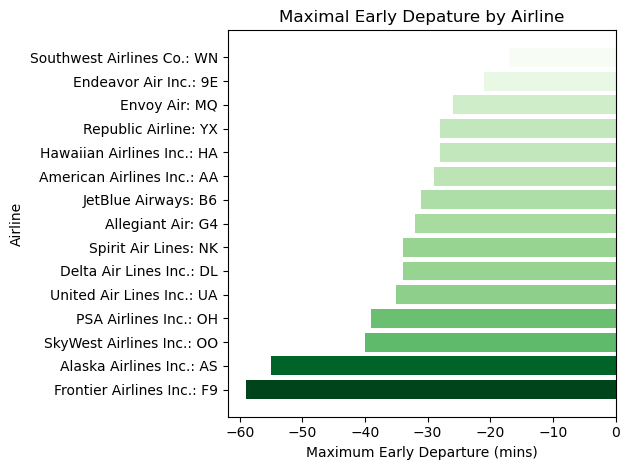

In [223]:
# Read in the Problem 2 Results
prob2 = pd.read_csv('./data/problem2_results.csv')
# print(prob2)
# taking the x and y values
x = prob2['Name']
y = prob2['max_early_departure']

# normalizing to get color gradient
norm = plt.Normalize(abs(y).min(), abs(y).max())
colors = plt.cm.Greens(norm(abs(y)))

# plotting horizontal bars
fig, ax = plt.subplots()
ax.barh(x, y, align='center', color=colors)
ax.set_xlabel('Maximum Early Departure (mins)')
ax.set_ylabel('Airline')
ax.set_title('Maximal Early Depature by Airline')
plt.tight_layout()
# saving the plot
plt.savefig('./output/prob2_fig')

# displaying the plot
plt.show()

# https://matplotlib.org/stable/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py

## Problem 3

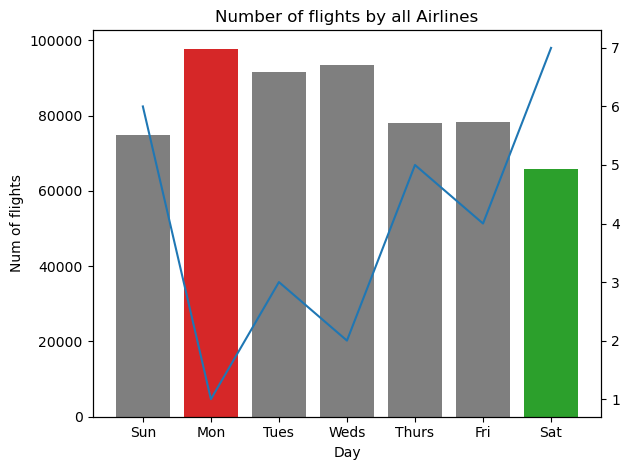

In [224]:
# Read in the Problem 3 Results
prob3 = pd.read_csv('./data/problem3_results.csv')

# Getting each of the data columns
days = ['Sun', 'Mon', 'Tues', 'Weds', 'Thurs', 'Fri', 'Sat']
flights = [74954, 97754, 91668, 93480, 78087, 78217, 65798]
ranks = [6, 1, 3, 2, 5, 4, 7]

# Creating the bar plots of the days and number of flights
fig, ax1 = plt.subplots()
# making specific colors for best and worst days
bar_colors = ['tab:grey', 'tab:red', 'tab:grey', 'tab:grey', 'tab:grey', 'tab:grey', 'tab:green']
ax1.bar(days, flights, color=bar_colors)
ax1.set_ylabel('Num of flights')
ax1.set_xlabel('Day')
ax1.set_title('Number of flights by all Airlines')

# Creating the second plot of rank
ax2 = ax1.twinx()
ax2.plot(days, ranks)
plt.tight_layout()
plt.savefig('./output/prob3_fig.png')
plt.show()

# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_colors.html#sphx-glr-gallery-lines-bars-and-markers-bar-colors-py
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html

## Problem 4

                                        Airport_Name Airport_Code  Avg_Delay
0  Allentown/Bethlehem/Easton, PA: Lehigh Valley ...          ABE    121.375


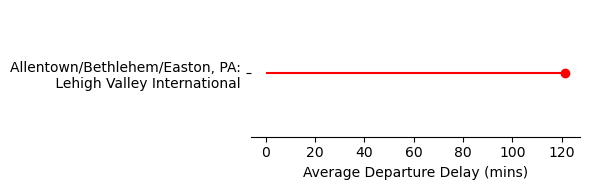

In [225]:
# Read in the Problem 4 Results
prob4 = pd.read_csv('./data/problem4_results.csv')
print(prob4)

# getting the values
airport = prob4['Airport_Name']
airport_name = prob4['Airport_Name'].iloc[0]
delay = prob4['Avg_Delay']
code = prob4['Airport_Code']

# putting a line break in the airport title
airport_label = airport_name.replace("PA:", "PA:\n")

# plotting a lollipop plot
fig, ax = plt.subplots(figsize=(6,2))
ax.hlines(y=airport_label, xmin=0, xmax=delay, color='red')
ax.plot(delay, airport_label, 'o', color='red')
ax.set_xlabel("Average Departure Delay (mins)")
# getting rid of the axes
for spine in ['top', 'right', 'left']:
    ax.spines[spine].set_visible(False)

# saving and displaying
plt.tight_layout()
plt.savefig('./output/prob4_fig.png')
plt.show()

# https://python-graph-gallery.com/182-vertical-lollipop-plot/

## Problem 5

In [226]:
# Read in the Problem 5 Results
prob5 = pd.read_csv('./data/problem5_results.csv')

# See power BI for visual

## Problem 6

   Cancelled  count(Cancelled)
0          0            576649
1          1              3310


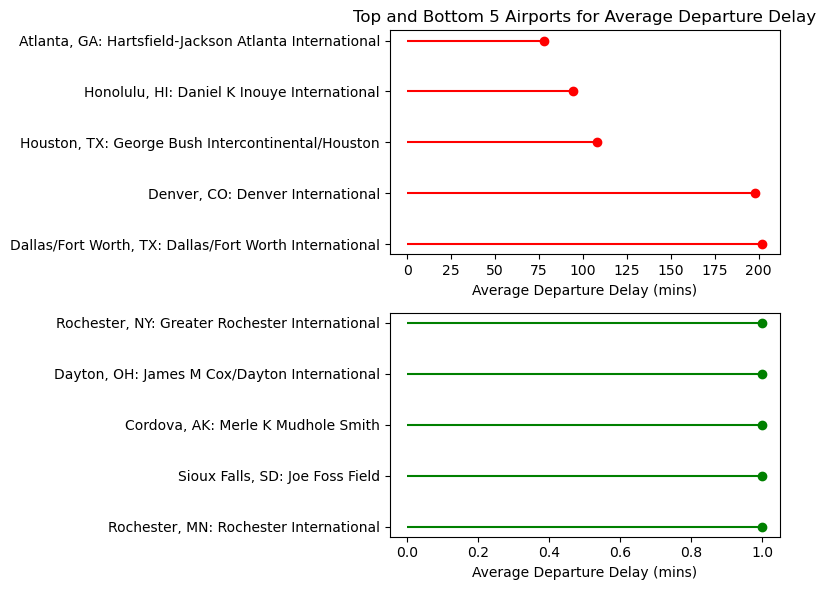

In [227]:
# Read in the Problem 6 Results
prob6a = pd.read_csv('./data/problem6a_results.csv')
prob6b = pd.read_csv('./data/problem6b_results.csv')
print(prob6a)

# getting the variables
airports = prob6b['Name']
reasons = prob6b['Reason']
num_cancel = prob6b['num_cancellations']

# taking only the top 5
airports_top10 = airports[:5]
reasons_top10 = reasons[:5]
num_cancel_top10 = num_cancel[:5]

# taking only the bottom 5
airports_bot10 = airports[-5:]
reasons_bot10 = reasons[-5:]
num_cancel_bot10 = num_cancel[-5:]

# plotting a lollipop plot of top 5 and bottom 5
fig, axes = plt.subplots(2, 1, figsize=(8,6))
axes[0].hlines(y=airports_top10, xmin=0, xmax=num_cancel_top10, color='red')
axes[0].plot(num_cancel_top10, airports_top10, 'o', color='red')
axes[0].set_xlabel("Average Departure Delay (mins)")
axes[0].set_title("Top and Bottom 5 Airports for Average Departure Delay")
axes[1].hlines(y=airports_bot10, xmin=0, xmax=num_cancel_bot10, color='green')
axes[1].plot(num_cancel_bot10, airports_bot10, 'o', color='green')
axes[1].set_xlabel("Average Departure Delay (mins)")

# saving and displaying
plt.tight_layout()
plt.savefig('./output/prob6_fig.png')
plt.show()

# https://python-graph-gallery.com/182-vertical-lollipop-plot/

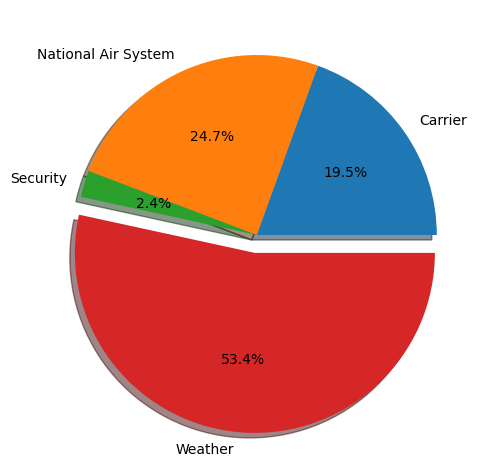

In [228]:
# Read in the Problem 6 Results
prob6b = pd.read_csv('./data/problem6b_results.csv')

# getting the variables
airports = prob6b['Name']
reasons = prob6b['Reason']
num_cancel = prob6b['num_cancellations']

reasons = prob6b.groupby("Reason")["num_cancellations"].sum()
reason_labels = ['Carrier', 'National Air System', 'Security', 'Weather']
cancels = [449, 570, 55, 1231]
explode = (0, 0, 0, 0.1)
fig, ax = plt.subplots()
ax.pie(cancels, explode=explode, labels=reason_labels, autopct='%1.1f%%', shadow=True)

plt.tight_layout()
plt.savefig('./output/prob6_2_fig.png')
plt.show()

# https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py

## Problem 7

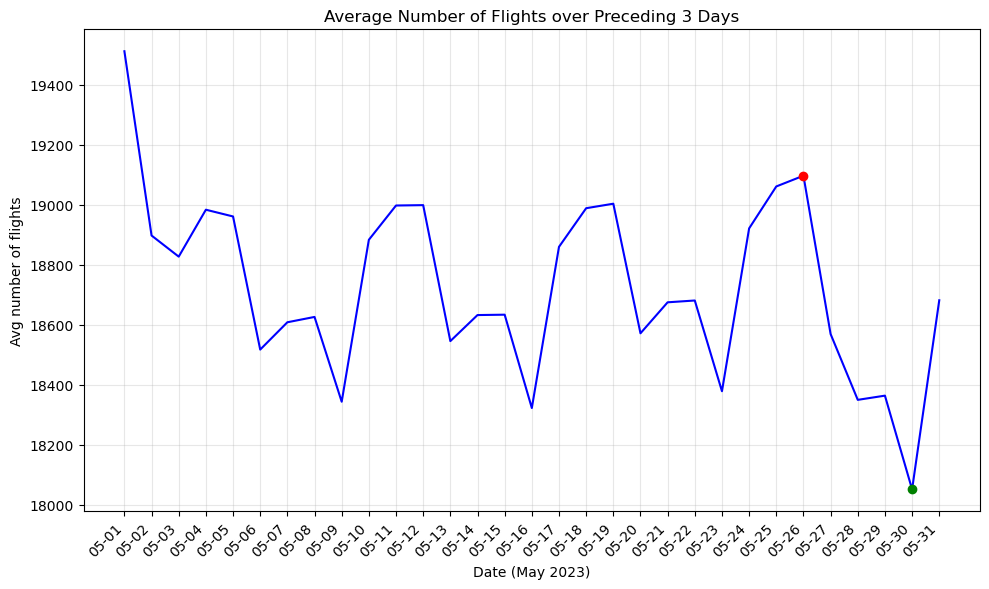

In [229]:
# Read in the Problem 7 Results
prob7 = pd.read_csv('./data/problem7_results.csv')

# getting the variables
prob7["date_clean"] = prob7["FlightDate"].str.replace("2023-", "", regex=False) # removing the year
date = prob7['date_clean']
avg_flights = prob7['avg_num_flights']

# plotting the time series
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(date, avg_flights, color='blue')
plt.xticks(rotation=45, ha='right') # rotating the dates
plt.xlabel('Date (May 2023)')
plt.ylabel('Avg number of flights')
plt.title("Average Number of Flights over Preceding 3 Days")
plt.grid(True, alpha=0.3)

# adding red dot for worst day
dot_red = pd.to_datetime('05-26-2023')
dot_red_str = dot_red.strftime("%m-%d")
y_value = avg_flights[prob7["date_clean"] == dot_red_str].values[0]
plt.scatter(dot_red_str, y_value, color='red', zorder=5)

# adding green dot for best day
dot_green = pd.to_datetime('05-30-2023')
dot_green_str = dot_green.strftime("%m-%d")
y_value = avg_flights[prob7["date_clean"] == dot_green_str].values[0]
plt.scatter(dot_green_str, y_value, color='green', zorder=5)

# plotting and saving
plt.tight_layout()
plt.savefig('./output/prob7_fig.png')
plt.show()

# https://stackoverflow.com/questions/63304990/adding-specific-dots-to-a-series-plot-in-python